# Refactoring practice

In [2]:
import polars as pl

#### Data set

In [6]:
exhibitions = pl.read_csv('./data/MoMAExhibitions1929to1989 (1).csv', infer_schema_length=10000)

exhibitions

ExhibitionID,ExhibitionNumber,ExhibitionTitle,ExhibitionCitationDate,ExhibitionBeginDate,ExhibitionEndDate,ExhibitionSortOrder,ExhibitionURL,ExhibitionRole,ExhibitionRoleinPressRelease,ConstituentID,ConstituentType,DisplayName,AlphaSort,FirstName,MiddleName,LastName,Suffix,Institution,Nationality,ConstituentBeginDate,ConstituentEndDate,ArtistBio,Gender,VIAFID,WikidataID,ULANID,ConstituentURL
i64,str,str,str,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,i64,i64,str,str,i64,str,i64,str
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Curator""","""Director""",9168,"""Individual""","""Alfred H. Barr, Jr.""","""Barr Alfred H. Jr.""","""Alfred""","""H.""","""Barr""","""Jr.""",null,"""American""",1902,1981,"""American, 1902ñ1981""","""Male""",109252853,"""Q711362""",500241556,"""moma.org/artists/9168"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",1053,"""Individual""","""Paul CÈzanne""","""CÈzanne Paul""","""Paul""",null,"""CÈzanne""",null,null,"""French""",1839,1906,"""French, 1839ñ1906""","""Male""",39374836,"""Q35548""",500004793,"""moma.org/artists/1053"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",2098,"""Individual""","""Paul Gauguin""","""Gauguin Paul""","""Paul""",null,"""Gauguin""",null,null,"""French""",1848,1903,"""French, 1848ñ1903""","""Male""",27064953,"""Q37693""",500011421,"""moma.org/artists/2098"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",2206,"""Individual""","""Vincent van Gogh""","""Gogh Vincent van""","""Vincent""",null,"""van Gogh""",null,null,"""Dutch""",1853,1890,"""Dutch, 1853ñ1890""","""Male""",9854560,"""Q5582""",500115588,"""moma.org/artists/2206"""
2557,"""1""","""CÈzanne, Gauguin, Seurat, Van …","""[MoMA Exh. #1, November 7-Dece…","""11/7/29""","""12/7/29""",1.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",5358,"""Individual""","""Georges-Pierre Seurat""","""Seurat Georges-Pierre""","""Georges-Pierre""",null,"""Seurat""",null,null,"""French""",1859,1891,"""French, 1859ñ1891""","""Male""",24608076,"""Q34013""",500008873,"""moma.org/artists/5358"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
288,"""1536""","""Recent Japanese Posters from t…","""[MoMA Exh. #1536, December 9, …","""12/9/89""","""4/16/90""",1767.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",6215,"""Individual""","""Aijiro Wakita""","""Wakita Aijiro""","""Aijiro""",null,"""Wakita""",null,null,"""Japanese""",1942,null,"""Japanese, born 1942""","""Male""",18484958,null,null,"""moma.org/artists/6215"""
288,"""1536""","""Recent Japanese Posters from t…","""[MoMA Exh. #1536, December 9, …","""12/9/89""","""4/16/90""",1767.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",6486,"""Individual""","""Yoji Yamamoto""","""Yamamoto Yoji""","""Yoji""",null,"""Yamamoto""",null,null,"""Japanese""",1943,null,"""Japanese, born 1943""","""Male""",null,null,null,"""moma.org/artists/6486"""
288,"""1536""","""Recent Japanese Posters from t…","""[MoMA Exh. #1536, December 9, …","""12/9/89""","""4/16/90""",1767.0,"""moma.org/calendar/exhibitions/…","""Artist""","""Artist""",6487,"""Individual""","""Ryuichi Yamashiro""","""Yamashiro Ryuichi""","""Ryuichi""",null,"""Yamashiro""",null,null,"""Japanese""",1920,null,"""Japanese, born 1920""","""Male""",119202488,"""Q2178400""",null,"""moma.org/artists/6487"""


#### Example - one-hot: Creating indicator columns

The [one-hot](https://en.wikipedia.org/wiki/One-hot) transformation 
1. involves making an indicator column for each unique label, and
2. Is a common method for preparing categorical data for ML.

In [ ]:
# Making an American indicator using `.alias`
(exhibitions
 .select(pl.col('Nationality'))
 .with_columns((pl.when(pl.col('Nationality') == 'American')
                .then(pl.lit(1))
                .otherwise(pl.lit(0))
                .alias('American')
               )
              )
) 

## A WET transformation - Positional arguments

This solution is WET, not DRY, as all 7 of the expressions in mutate are very similar ... if only here was a way to perform these similar expressions all at once ...

In [ ]:
# Using positional arguments w/ an alias
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(pl.when(pl.col('ExhibitionRole') == 'Curator').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Curator'),         
               pl.when(pl.col('ExhibitionRole') == 'Artist').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Artist'),          
               pl.when(pl.col('ExhibitionRole') == 'Arranger').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Arranger'),        
               pl.when(pl.col('ExhibitionRole') == 'Installer').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Installer'),       
               pl.when(pl.col('ExhibitionRole') == 'Competition Judge').then(pl.lit(1)).otherwise(pl.lit(0)).alias('CompetitionJudge'),
               pl.when(pl.col('ExhibitionRole') == 'Designer').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Designer'),        
               pl.when(pl.col('ExhibitionRole') == 'Prepare').then(pl.lit(1)).otherwise(pl.lit(0)).alias('Preparer'))
 .head(5)
)
                                                    

### Identifying components that might need to change.

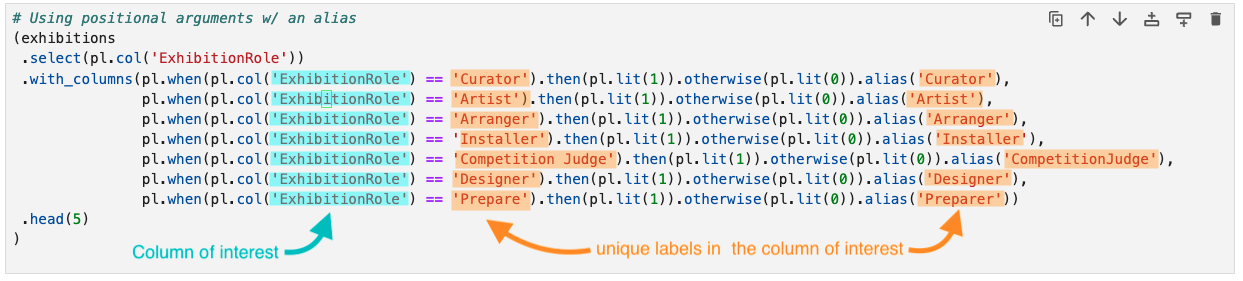

When refactoring a WET solution, start by inspecting the affending code and identify the parts that do/may-need-to

### Things we need.

1. A list of unique labels to iterate over,
2. A `lambda` function that captures the core column expression, and
3. A list comprehension that constructs the 7 column expressions by (A) iterating over the labels and (B) applying the helper from to create each expression. 

In [9]:
# Code for getting the unique labels (except Null/None).
exhibitions['ExhibitionRole'].unique().drop_nulls()

ExhibitionRole
str
"""Designer"""
"""Installer"""
"""Competition Judge"""
"""Artist"""
"""Arranger"""
"""Curator"""
"""Preparer"""


In [10]:
get_unq_cols = lambda df,col:df[col].unique().drop_nulls()
get_unq_cols(exhibitions,'ExhibitionRole')

ExhibitionRole
str
"""Preparer"""
"""Competition Judge"""
"""Arranger"""
"""Installer"""
"""Artist"""
"""Designer"""
"""Curator"""


In [4]:
# A helper function for creating the expression.
make_ind_col = lambda col,lbl: pl.when(pl.col(col) == lbl).then(pl.lit(1)).otherwise(pl.lit(0)).alias(lbl)

make_ind_col('ExhibitionRole','Curator')

<Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB0A8BCB0>

In [12]:
# A list comprehension that creates all 7 expression
[make_ind_col('ExhibitionRole',lbl) for lbl in get_unq_cols(exhibitions,'ExhibitionRole')]

[<Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB1446630>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB14458E0>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB143D910>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB143FAD0>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB143D370>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB143ECC0>,
 <Expr ['.when([(col("ExhibitionRole"))…'] at 0x1FEB143F7A0>]

In [13]:
# Using positional arguments w/ an alias
(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns([make_ind_col('ExhibitionRole',lbl) for lbl in get_unq_cols(exhibitions,'ExhibitionRole')])
 .head(5)
)
                                                    

ExhibitionRole,Arranger,Curator,Installer,Designer,Artist,Preparer,Competition Judge
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",0,1,0,0,0,0,0
"""Artist""",0,0,0,0,1,0,0
"""Artist""",0,0,0,0,1,0,0
"""Artist""",0,0,0,0,1,0,0
"""Artist""",0,0,0,0,1,0,0


### Next, we will put the finishing touches on the clean-up

In [14]:
# Refactor the original data management dot-chain by replacing the WET column expressions with the list comprehension.  
# Verify that the result remains unchanged.
get_unq_cols = lambda df,col:df[col].unique().drop_nulls()
[make_ind_col('ExhibitionRole',lbl) for lbl in get_unq_cols(exhibitions,'ExhibitionRole')]
onehot = lambda df,col:[make_ind_col(col,lbl) for lbl in get_unq_cols(df,col)]



(exhibitions
 .select(pl.col('ExhibitionRole'))
 .with_columns(onehot(exhibitions,'ExhibitionRole'))
 .head(5)
)
                                                    

ExhibitionRole,Curator,Arranger,Competition Judge,Designer,Installer,Artist,Preparer
str,i32,i32,i32,i32,i32,i32,i32
"""Curator""",1,0,0,0,0,0,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0
"""Artist""",0,0,0,0,0,1,0


In [13]:
# Now refactor the code one more time, this time packaging the comprehension in a lambda.
# Verify that the result remains unchanged.